#Can you fix my code?

I was working on yesterday's assignment, but I have so many errors!  Can you find and fix them all?

#Use the following information to answer the assignment questions below.

###Is head size related to brain weight in healthy adult humans?

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

**We wish to determine if there is a linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

In [2]:
#Import the Brainhead.csv dataset from a URL and print the first few rows

import pandas as pd
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


The two variables we are interested in - for now - are 

- Brain, the brain weight in kg
- Head, the head size in cubic cm

3) Fit the OLS model and print all of the results.

In [3]:
from statsmodels.formula.api import ols

#Enter the model in the format Y ~ X

model = ols('Head ~ Brain', data=df).fit()

#Print the model summary
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                   Head   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           5.96e-54
Time:                        11:41:29   Log-Likelihood:                -1613.4
No. Observations:                 237   AIC:                             3231.
Df Residuals:                     235   BIC:                             3238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    520.6101    153.215      3.398      0.0

9) Plot the confidence limits on our slope and intercept terms with a shaded area around our regression line.

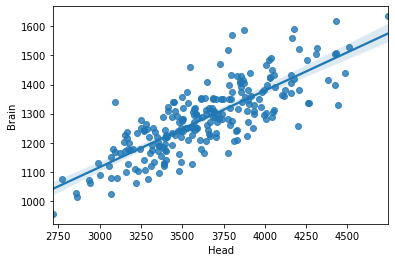

In [5]:
import seaborn as sns

ax = sns.regplot(x="Head", y="Brain", data = df)

#Use the following information to answer the assignment questions below

Import the Sleep.csv dataset from a URL and print the first few rows

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset. 


Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.



Data Dictionary:

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



In [7]:
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

sleep = pd.read_csv(data_url, skipinitialspace=True, header=0)

sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


11) Plot and describe the relationship between gestation time and time spent in dreaming sleep.

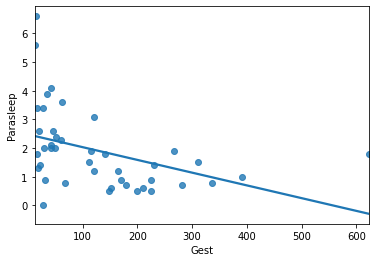

In [8]:
#Use Seaborn to create the scatterplot and overlay the regression line

#Turn off CI plotting for today
ax = sns.regplot(x="Gest", y="Parasleep", data=sleep, ci=None)
# they seem to be a negative linear relationship between Gestaion time and dreaming sleep

12) Create a new variable with the log of gestational time.

In [14]:
import numpy as np
sleep['log_gest'] = np.log(sleep['Gest'])

sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,log_gest
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,3.737670
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,6.436150
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,5.192957
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1,3.555348
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,5.971262


13) Plot and describe the relationship of the log of gestational time and dreaming sleep

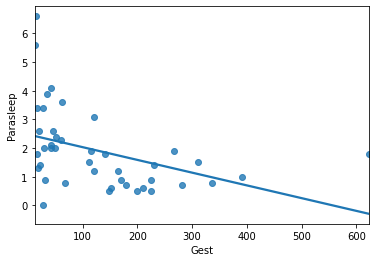

In [15]:
import seaborn as sns

#Turn off CI plotting for today
ax = sns.regplot(x="Gest", y="Parasleep", data=sleep, ci=None)

14) Model the relationship of the log of gestation time and dreaming sleep using ols.

In [16]:
from statsmodels.formula.api import ols

#Enter the model in the format Y ~ X

model = ols('Parasleep ~ log_gest', data=sleep).fit()

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     19.49
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           7.48e-05
Time:                        11:45:58   Log-Likelihood:                -64.550
No. Observations:                  42   AIC:                             133.1
Df Residuals:                      40   BIC:                             136.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1762      0.763      6.782      0.0

16) Predict the amount of dreaming sleep that a mammal that gestates her young for 262 days gets.

In [17]:
#Specify the value of x we'd like to predict
x = 262

#Take the natural log of x
ln_x = np.log(x)

#Extract the slope and intercept values from the model paramters
intercept = model.params[0]
slope = model.params[1]

#Use the model coefficients and plug the new value of x into the regression equation
predict = intercept + slope*ln_x

print('ln 262 = ', ln_x)
print('Predicted dreaming sleep = ', predict)

ln 262 =  5.568344503761097
Predicted dreaming sleep =  1.005883623917586
